# Backtrack Testbed Notebook

Short notebook to test Bryans functions.

In [2]:
# Standard library
import sys

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import metpy 

We want MetPy ver 1.6.1

In [3]:
# !pip install metpy --upgrade

In [4]:
print(f" Harnessing the power of MetPy version {metpy.__version__} ️")

 Harnessing the power of MetPy version 1.6.1 ️


In [5]:
sys.path.insert(1, '../sealsml')

# Azimuth Testing

In [6]:
from geometry import GeoCalculator, polar_to_cartesian

In [7]:
# x, y, and z

ref = np.array([[0., 0., 0.],
                [0., 0., 0.],
                [0., 0., 0.],
                [0., 0., 0.]])

target = np.array([[0., 1., 0.], # north, 0
                   [1., 0., 0.],
                   [0., -1., 0.],
                   [-1., 0., 0.]])

In [8]:
geometry_class = GeoCalculator(ref, target)
geometry_class.calculate_azimuth()

Warning, Azimuth Calculation might be wrong for vertically offset points


array([  0.,  90., 180., 270.])

# Random u and v data

In [9]:
# Set the number of examples
num_examples = 100

# Generate random u and v components using a normal distribution with mean 0 and standard deviation 5
u_data = np.random.normal(loc=0, scale=5, size=num_examples)
v_data = np.random.normal(loc=0, scale=5, size=num_examples)

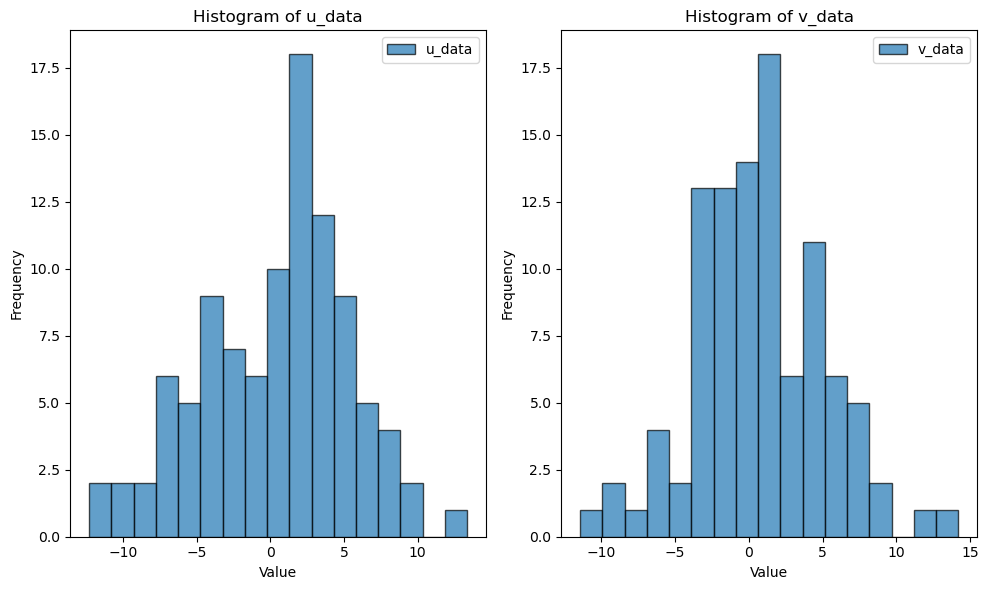

In [10]:
n_bins = 17

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Create the histograms
ax1.hist(u_data, bins=n_bins, edgecolor='black', alpha=0.7, label='u_data')
ax2.hist(v_data, bins=n_bins, edgecolor='black', alpha=0.7, label='v_data')

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of u_data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of v_data')

# Add legend
ax1.legend()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Let's show how to use MetPy Calc

In [11]:
from metpy.calc import wind_direction
from metpy.calc import wind_speed

from metpy.units import units

In [12]:
wind_dir = wind_direction(u_data*units("m/s"), v_data*units("m/s"))

windspeed = wind_speed(u_data*units("m/s"), v_data*units("m/s"))
windspeed

Magnitude,[0.6459003082977661 10.163273998399195 5.18954124448771 9.235412130587621 3.1728281316242724 3.252075757736078 12.519846981582997 9.088823184940878 2.322028115940065 12.110892141770599 4.388410502857845 2.286579499833256 4.910419511499223 4.779960561687158 2.311598901802595 4.528386373841583 1.77685077081104 8.747509961318983 1.379273107890702 6.017257725027678 3.294743496282556 9.199117022357537 2.171604871909285 5.007167863028553 5.427325058891187 10.73601755876642 1.6741167776691286 6.557843800933317 3.295241721854432 2.4587948798051373 2.6502856904452745 6.810577974070883 5.26907753778106 0.6770901745887346 2.5551205120443443 8.798546343353586 5.182760474329907 8.698804792685813 7.073797668972395 5.662788109716392 3.3607869830614776 6.20359307347391 4.787409066711357 7.754655157416137 8.867644072163666 2.3481161869721983 3.903033600499409 3.5112284831993814 6.559629222913974 2.0448257143093804 5.764410026749447 6.284091556468072 5.449140041342811 7.884121565311666 9.208319278585737 5.153010454981662 2.794599004960035 9.84649136422459 11.036039057020272 1.6301897914568924 5.525242840699046 5.583209989637832 8.048198718937849 14.205416596780648 6.2324423152090525 5.11150594572362 2.0302363981227614 5.586978924105733 5.177842758105674 10.263888808961305 7.3947162179979085 8.274010959235724 9.64565155784241 5.051877505733091 13.984959814144789 5.184240177469593 4.81433801920152 6.4138717802491705 7.037786989866641 7.472342732593325 10.167357156016955 7.917272421824617 9.340989814679 3.030979390764911 7.379327883214273 7.998753289397124 3.914742959392899 4.330156398659824 7.431024246784869 3.6873654594814593 8.635221237054552 13.311291698274266 11.744814601944958 3.631448581305135 3.389107859459402 5.647969956279497 7.751872105155362 3.9632329450153874 3.263700593489815 6.3370686271482555]
Units,meter/second


# lets try to find Ch4 max, first lets make an array of random ch4 data

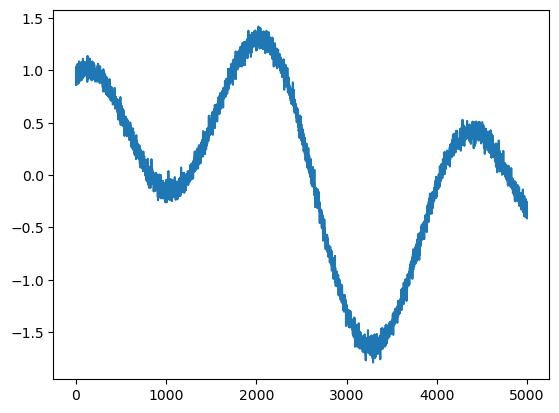

In [13]:
# Define number of data points
N = 5000

# Generate random frequencies and amplitudes for sin and cos
freq_sin = np.random.uniform(0.1, 0.5)
amp_sin = np.random.uniform(0.5, 1.5)
freq_cos = np.random.uniform(0.2, 0.8)
amp_cos = np.random.uniform(0.5, 1.5)

# Generate time series data as a 1D array
t = np.linspace(0, 20, N)
data = amp_sin * np.sin(freq_sin * t) + amp_cos * np.cos(freq_cos * t) + np.random.randn(N) * 0.05

plt.plot(data)


In [14]:
from backtrack import findmaxCH4

In [15]:
%%time
max_c_noloop, time_max_c_noloop, ijk_max_noloop = findmaxCH4(data, t)

CPU times: user 170 µs, sys: 104 µs, total: 274 µs
Wall time: 244 µs


#### findmaxCH4 has been tested by Bryan, seems to work as intended

# Backtrack Function Testing

In [16]:
from backtrack import backtrack

## These variables are all made up. Just looking to see what it requires and see if it runs. 

In [20]:
sensor_x = 1
sensor_y = 2

pathmax = 3.2
dt = 1

ijk_start = 2

u_sonic = u_data
v_sonic = v_data

In [21]:
np.size(ijk_start)

1

In [22]:
%%time
backtrack(ijk_start, u_sonic, v_sonic, dt, sensor_x, sensor_y, 5)

CPU times: user 95 µs, sys: 1 µs, total: 96 µs
Wall time: 98.9 µs


(-7.465484488157031, 0.07838729355402585)

### Pathmax Function

In [23]:
from backtrack import pathmax

In [24]:
factor_x = 0.5
x_width = 11
factor_y = 0.25
y_width = (30, 2)


Next one is supposted to error

In [25]:
pathmax( x_width, y_width, factor_x, factor_y)

TypeError: All inputs must have the same shape.

In [26]:
y_width = 30

This should work:

In [27]:
paths = pathmax( x_width, y_width, factor_x, factor_y)
paths

5.5

### Data ingester for B Travis

In [28]:
data = '../test_data/training_data_SBL2m_Ug2p5_src1-8kg_b.5.nc'

In [29]:
ds = xr.load_dataset(data)

In [30]:
x = ds.encoder_input.isel(mask=0).values

I need to clean this up, and add ch4 to the output. But this is what I have so far. 

In [152]:
def create_input_data_for_bryan(x, num_met_sensors =1, num_sensors = 3):
    '''
    This function uses numpy arrays as input
    The variable should have a length of 8: ['ref_distance', 'ref_azi_sin', 'ref_azi_cos', 'ref_elv', 'u', 'v', 'w', 'q_CH4']
    '''
    print('Shape of input x', x.shape)

    n_timesteps = x.shape[2]

    factor_x = 0.4
    x_width = 40
    factor_y = 0.4
    y_width = 40

    dt = 1

    pathmax_value = pathmax( x_width, y_width, factor_x, factor_y)

    complete_array = []

    for i in range(x.shape[0]): # this loop might be unessary
        # print('sample numnber', i)

        # append to some lists
        backtrack_u_ = []
        backtrack_v_ = []
        max_idx_ = []
        ch4_matrix = []

        ## U & V time series extracted from met sensor
        u = x[i][[0], :, 4]
        v  = x[i][[0], :, 5]
        
        # pulling met sensor location
        met_dist = x[i][[0], :, 0].T[0]
        met_azi_sin  = x[i][[0], :, 1].T[0]
        met_azi_cos  = x[i][[0], :, 2].T[0]
        x_met, y_met = polar_to_cartesian(met_dist, met_azi_sin, met_azi_cos)

        # pulling the information from the ch4 sensors, distance, azi_sin and azi_cos and ch4
        ref_dist = x[i][[1, 2, 3], :, 0].T[0]
        azi_sin  = x[i][[1, 2, 3], :, 1].T[0]
        azi_cos  = x[i][[1, 2, 3], :, 2].T[0]
        ch4_data_ts = x[i][[1, 2, 3], :, 7]


        x_, y_ = polar_to_cartesian(ref_dist, azi_sin, azi_cos)
        ref_elevation  = x[i][[1, 2, 3], :, 3].T[0]
        stacked_data = np.column_stack((x_, y_, ref_elevation))
        # This variable is 3 by 9 
        repeated_pos = np.repeat(stacked_data, num_sensors).reshape(9,num_sensors).T
        
        ## emissions data
        for q in range(num_sensors):
            # print('sensor number', q+1)
            
            ch4_data = x[i][[1, 2, 3], :, 7][q]
            #print(ch4_data.shape)
            # findmaxch4
            max_c, time_max_c, max_idx = findmaxCH4(ch4_data, np.arange(n_timesteps)) 
            #print('max_c, max_idx, time_max_c')
            #print(max_c, max_idx, time_max_c)
            backtrack_u, backtrack_v = backtrack(ijk_start=time_max_c, u_sonic=u.ravel(), v_sonic=v.ravel(), dt=dt, sensor_x=x_met[0], sensor_y=y_met[0], pathmax=pathmax_value)

            # append
            backtrack_u_.append(backtrack_u)
            backtrack_v_.append(backtrack_v)
            max_idx_.append(max_idx)
        
        ch4_matrix.append(ch4_data_ts[:, max_idx_].T)
        ch4_matrix_array = np.array(ch4_matrix).squeeze()
        backtrack_u_array = np.array(backtrack_u_).reshape(3, 1)
        backtrack_v_array = np.array(backtrack_v_).reshape(3, 1)
        merged_array = np.concatenate((repeated_pos, ch4_matrix_array, backtrack_u_array, backtrack_v_array), axis=1)
        complete_array.append(merged_array)
    # Goal to export:
    # x, y, z, x1, y1, z1, x2, y2, z2, ch4, ch4-1, ch4-2, backtrack_u, backtrack_v
    # that three times
    print('shape of export array:', np.array(complete_array).shape)
    return np.array(complete_array)

In [153]:
yo = create_input_data_for_bryan(x)

Shape of input x (600, 10, 100, 8)
shape of export array: (600, 3, 14)
